In [1]:

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7
# pl.rcParams['axes.titlesize'] = 5
# pl.rcParams['legend.fontsize'] = 5
# pl.rcParams['xtick.labelsize'] = 5
# pl.rcParams['ytick.labelsize'] = 5
# pl.rcParams['font.size'] = 7

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'activity_dhpc'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'autolabel', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'combine_patterns', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'percent_trials_active', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'trials_active', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [8]:
all_animals =  'dhpcg1','dhpc24','dhpcg20','dhpc35','dhpc36'
expo_animals = 'dhpcg1','dhpc24','dhpcg20','dhpc35','dhpc36'
pre_animals =  'dhpcg1','dhpc24','dhpc35','dhpc36'
d2_animals =   'dhpcg1','dhpc24','dhpcg20','dhpc35','dhpc36'
post_animals = 'dhpcg1','dhpc24','dhpcg20','dhpc35','dhpc36'
renew_animals ='dhpcg1','dhpc24','dhpcg20','dhpc35','dhpc36'
ext2_animals = 'dhpcg1','dhpc24','dhpcg20','dhpc35','dhpc36'
ext1_animals = 'dhpcg1','dhpc24','dhpcg20','dhpc35','dhpc36'

In [9]:
for sess in 'pre','d2', 'post', 'ext1', 'ext2', 'renew':

    exec("patterns_CS_%s = dict(zip(%s_animals, [ut.load_variable('patterns_CS_evs_%s',\
                                                           '../%%s/notebooks/autorestore/decoding_all/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("patterns_tr_%s = dict(zip(%s_animals, [ut.load_variable('patterns_evs_%s',\
                                                           '../%%s/notebooks/autorestore/decoding_all/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("patterns_CS_%s_1s = dict(zip(%s_animals, [ut.load_variable('patterns_CS_evs_%s_1s',\
                                                           '../%%s/notebooks/autorestore/decoding_all/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("patterns_tr_%s_1s = dict(zip(%s_animals, [ut.load_variable('patterns_evs_%s_1s',\
                                                           '../%%s/notebooks/autorestore/decoding_all/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                         '../%%s/notebooks/autorestore/decoding_all/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [10]:
#have to extract 2_odor_expo varibles differently from that used above
patterns_CS_expo = dict(zip(expo_animals,
                                [ut.load_variable('patterns_CS_evs_expo','../%s/notebooks/autorestore/decoding_all'%ani)
                                                  for ani in expo_animals]))
patterns_tr_expo = dict(zip(expo_animals,
                                [ut.load_variable('patterns_evs_expo','../%s/notebooks/autorestore/decoding_all'%ani)
                                                  for ani in expo_animals]))
patterns_CS_expo_1s = dict(zip(expo_animals,
                                [ut.load_variable('patterns_CS_evs_expo_1s','../%s/notebooks/autorestore/decoding_all'%ani)
                                                  for ani in expo_animals]))
patterns_tr_expo_1s = dict(zip(expo_animals,
                                [ut.load_variable('patterns_evs_expo_1s','../%s/notebooks/autorestore/decoding_all'%ani)
                                                  for ani in expo_animals]))

labels_expo = dict(zip(expo_animals,
                                [ut.load_variable('labels_expo','../%s/notebooks/autorestore/decoding_all'%ani)
                                                  for ani in expo_animals]))

In [11]:
for sess in 'pre','d2', 'post', 'ext1', 'ext2', 'renew':

    exec("patterns_cstr_%s = dict(zip(%s_animals, [ut.load_variable('patterns_evs',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_odors_cs_and_trace/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_cstr_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_odors_cs_and_trace/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [12]:
##have to extract 2_odor_expo varibles differently from that used above
#patterns_cstr_expo = dict(zip(expo_animals,
#                                [ut.load_variable('patterns_evs','../%s/2_odor_expo/notebooks/autorestore/decoding_odors_cs_and_trace'%ani)
#                                                  for ani in expo_animals]))
#
#labels_cstr_expo = dict(zip(expo_animals,
#                                [ut.load_variable('labels','../%s/2_odor_expo/notebooks/autorestore/decoding_odors_cs_and_trace'%ani)
#                                                  for ani in expo_animals]))

In [13]:
def combine_patterns(patterns, labels, n_patterns=100, classes=[0, 1], labels_mask=None):
    if labels_mask is None:
        labels_mask = range(120)
    patterns_comb_train = []
    for i in xrange(n_patterns):
        for odor in classes:
            p = np.concatenate([patterns[ani][np.random.choice([w for w in np.where(labels[ani]==odor)[0] if w in labels_mask])]
                                for ani in patterns.keys()])
            patterns_comb_train.append(p)
    return np.r_[patterns_comb_train]

#labels_comb = np.r_[[1, 0]*1000]

In [14]:
##how many trials is a particular cell active?
#for cell in range(len(patterns_comb_CS_pre[0])):
#    exec("trials_active_%s = 0"%cell)
#    for trial in patterns_comb_CS_pre[labels_comb==1]:
#        if trial[cell]>0:
#            exec("trials_active_%s = trials_active_%s+1"%(cell,cell))
#    print eval("trials_active_%s"%cell),

In [15]:
n_patterns=100
labels_comb = np.r_[[1, 0]*n_patterns]

In [16]:
patterns_comb_CS_expo = combine_patterns(patterns_CS_expo, labels_expo, n_patterns=n_patterns, labels_mask=range(30))
patterns_comb_CS_pre = combine_patterns(patterns_CS_pre, labels_pre, n_patterns=n_patterns)
patterns_comb_CS_d2 = combine_patterns(patterns_CS_d2, labels_d2, n_patterns=n_patterns)
patterns_comb_CS_post = combine_patterns(patterns_CS_post, labels_post, n_patterns=n_patterns)
patterns_comb_CS_ext1 = combine_patterns(patterns_CS_ext1, labels_ext1, n_patterns=n_patterns)
patterns_comb_CS_ext2 = combine_patterns(patterns_CS_ext2, labels_ext2, n_patterns=n_patterns)
patterns_comb_CS_renew = combine_patterns(patterns_CS_renew, labels_renew, n_patterns=n_patterns)

In [17]:
patterns_comb_tr_expo = combine_patterns(patterns_tr_expo, labels_expo, n_patterns=n_patterns, labels_mask=range(30))
patterns_comb_tr_pre = combine_patterns(patterns_tr_pre, labels_pre, n_patterns=n_patterns)
patterns_comb_tr_d2 = combine_patterns(patterns_tr_d2, labels_d2, n_patterns=n_patterns)
patterns_comb_tr_post = combine_patterns(patterns_tr_post, labels_post, n_patterns=n_patterns)
patterns_comb_tr_ext1 = combine_patterns(patterns_tr_ext1, labels_ext1, n_patterns=n_patterns)
patterns_comb_tr_ext2 = combine_patterns(patterns_tr_ext2, labels_ext2, n_patterns=n_patterns)
patterns_comb_tr_renew = combine_patterns(patterns_tr_renew, labels_renew, n_patterns=n_patterns)

In [17]:
#patterns_comb_cstr_expo = combine_patterns(patterns_cstr_expo, labels_cstr_expo, n_patterns=n_patterns, labels_mask=range(30))
patterns_comb_cstr_pre = combine_patterns(patterns_cstr_pre, labels_cstr_pre, n_patterns=n_patterns)
patterns_comb_cstr_post = combine_patterns(patterns_cstr_post, labels_cstr_post, n_patterns=n_patterns)
patterns_comb_cstr_ext1 = combine_patterns(patterns_cstr_ext1, labels_cstr_ext1, n_patterns=n_patterns)
patterns_comb_cstr_ext2 = combine_patterns(patterns_cstr_ext2, labels_cstr_ext2, n_patterns=n_patterns)
patterns_comb_cstr_renew = combine_patterns(patterns_cstr_renew, labels_cstr_renew, n_patterns=n_patterns)

In [18]:
sessions= 'expo','pre','d2','post','ext1','ext2','renew'
dark_co = ('forestgreen','darkcyan','rebeccapurple','firebrick','lightgrey','dimgrey','goldenrod')

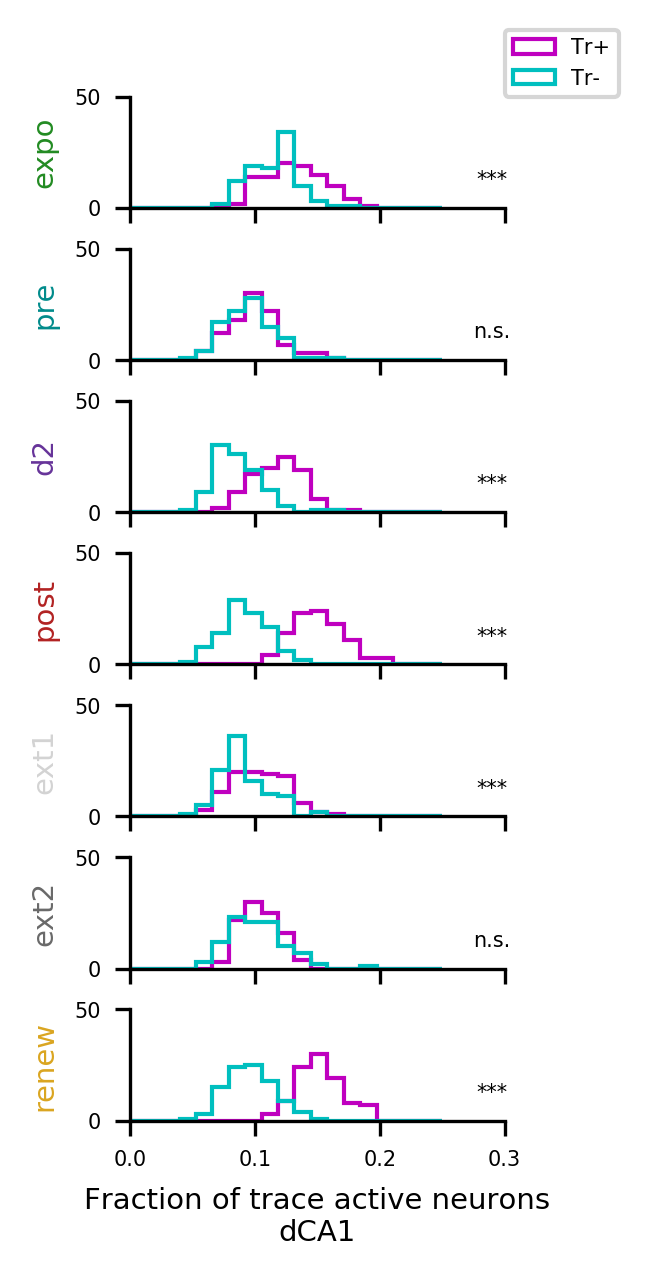

In [23]:
fig, ax = pl.subplots(7, 1, figsize=(1.8, 4), sharey=True, sharex=True)

for sess,i in zip(sessions,range(7)):
    #[ax[i].hist(eval("(patterns_comb_tr_%s[labels_comb==odor]>0).mean(1)"%sess),histtype='step', bins=np.linspace(0, 0.25, 20))
    # for odor in [0, 1]]
    ax[i].hist(eval("(patterns_comb_tr_%s[labels_comb==0]>0).mean(1)"%sess),color='m',histtype='step', bins=np.linspace(0, 0.25, 20))
    ax[i].hist(eval("(patterns_comb_tr_%s[labels_comb==1]>0).mean(1)"%sess),color='c',histtype='step', bins=np.linspace(0, 0.25, 20))
    ax[i].set_ylabel(sess, color = dark_co[i]);

ax[0].set_yticks((0,50))
ax[0].set_xlim(0, 0.3)

ax[6].set_xlabel('Fraction of trace active neurons\ndCA1')
ax[0].legend(['Tr+', 'Tr-'], loc=(1, 1))

pvs = []
for sess,i in zip(sessions,range(7)):
    pvs.append(pt.add_significance(ax[i],
                    eval("(patterns_comb_tr_%s[labels_comb==0]>0).mean(1)"%sess),
                    eval("(patterns_comb_tr_%s[labels_comb==1]>0).mean(1)"%sess),
                    0.29, 0.29, 10, ticksize=0,
                               sig_func=sstats.ks_2samp))
ax[0].set_ylim(0, 50)
fig.tight_layout(pad=1)
fig.savefig('../img/fraction_active_tr.jpg')
np.savetxt('../img/fraction_active_tr.pvs', pvs, header='Mann-Whitney U, two-sided for pre, post, ext2')

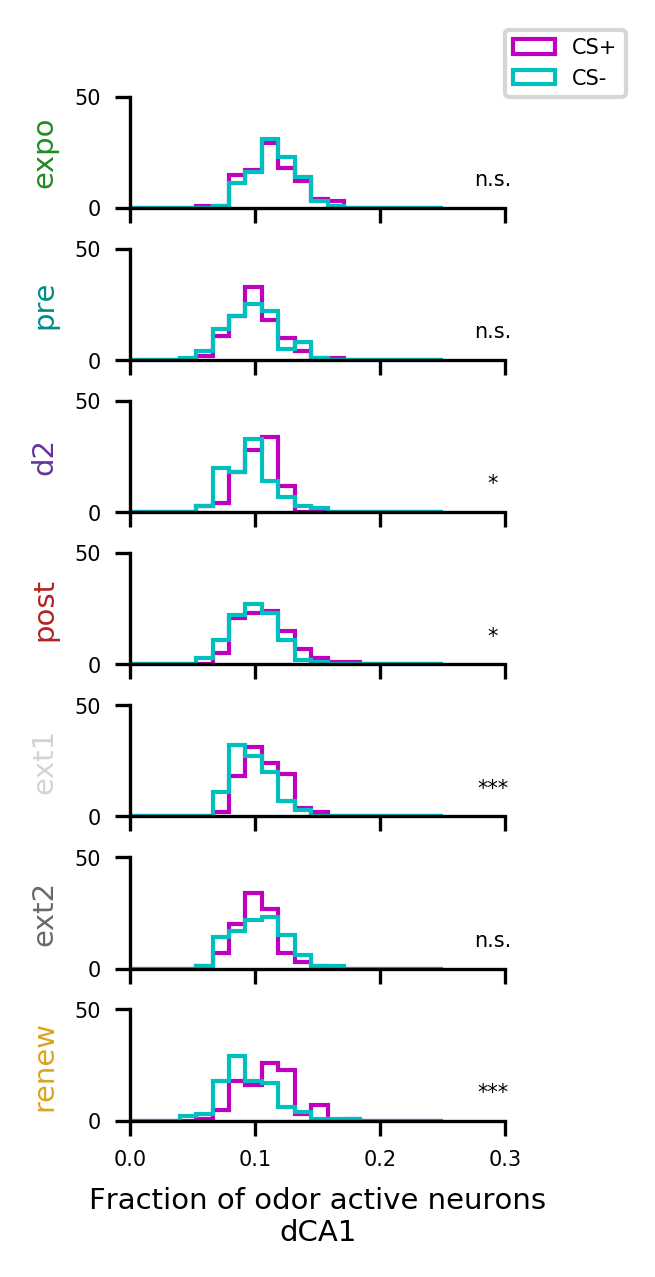

In [24]:
fig, ax = pl.subplots(7, 1, figsize=(1.8, 4), sharey=True, sharex=True)

for sess,i in zip(sessions,range(7)):
    #[ax[i].hist(eval("(patterns_comb_tr_%s[labels_comb==odor]>0).mean(1)"%sess),histtype='step', bins=np.linspace(0, 0.25, 20))
    # for odor in [0, 1]]
    ax[i].hist(eval("(patterns_comb_CS_%s[labels_comb==0]>0).mean(1)"%sess),color='m',histtype='step', bins=np.linspace(0, 0.25, 20))
    ax[i].hist(eval("(patterns_comb_CS_%s[labels_comb==1]>0).mean(1)"%sess),color='c',histtype='step', bins=np.linspace(0, 0.25, 20))
    ax[i].set_ylabel(sess, color = dark_co[i]);

ax[0].set_yticks((0,50))
ax[0].set_xlim(0, 0.3)

ax[6].set_xlabel('Fraction of odor active neurons\ndCA1')
ax[0].legend(['CS+', 'CS-'], loc=(1, 1))

pvs = []
for sess,i in zip(sessions,range(7)):
    pvs.append(pt.add_significance(ax[i],
                    eval("(patterns_comb_CS_%s[labels_comb==0]>0).mean(1)"%sess),
                    eval("(patterns_comb_CS_%s[labels_comb==1]>0).mean(1)"%sess),
                    0.29, 0.29, 10, ticksize=0,
                               sig_func=sstats.ks_2samp))
ax[0].set_ylim(0, 50)
fig.tight_layout(pad=1)
fig.savefig('../img/fraction_active_CS.jpg')
np.savetxt('../img/fraction_active_CS.pvs', pvs, header='Mann-Whitney U, two-sided for pre, post, ext2')

In [25]:
patterns_comb_CS_expo_1s = combine_patterns(patterns_CS_expo_1s, labels_expo, n_patterns=n_patterns, labels_mask=range(30))
patterns_comb_CS_pre_1s = combine_patterns(patterns_CS_pre_1s, labels_pre, n_patterns=n_patterns)
patterns_comb_CS_d2_1s = combine_patterns(patterns_CS_d2_1s, labels_d2, n_patterns=n_patterns)
patterns_comb_CS_post_1s = combine_patterns(patterns_CS_post_1s, labels_post, n_patterns=n_patterns)
patterns_comb_CS_ext1_1s = combine_patterns(patterns_CS_ext1_1s, labels_ext1, n_patterns=n_patterns)
patterns_comb_CS_ext2_1s = combine_patterns(patterns_CS_ext2_1s, labels_ext2, n_patterns=n_patterns)
patterns_comb_CS_renew_1s = combine_patterns(patterns_CS_renew_1s, labels_renew, n_patterns=n_patterns)

In [26]:
patterns_comb_tr_expo_1s = combine_patterns(patterns_tr_expo_1s, labels_expo, n_patterns=n_patterns, labels_mask=range(30))
patterns_comb_tr_pre_1s = combine_patterns(patterns_tr_pre_1s, labels_pre, n_patterns=n_patterns)
patterns_comb_tr_d2_1s = combine_patterns(patterns_tr_d2_1s, labels_d2, n_patterns=n_patterns)
patterns_comb_tr_post_1s = combine_patterns(patterns_tr_post_1s, labels_post, n_patterns=n_patterns)
patterns_comb_tr_ext1_1s = combine_patterns(patterns_tr_ext1_1s, labels_ext1, n_patterns=n_patterns)
patterns_comb_tr_ext2_1s = combine_patterns(patterns_tr_ext2_1s, labels_ext2, n_patterns=n_patterns)
patterns_comb_tr_renew_1s = combine_patterns(patterns_tr_renew_1s, labels_renew, n_patterns=n_patterns)

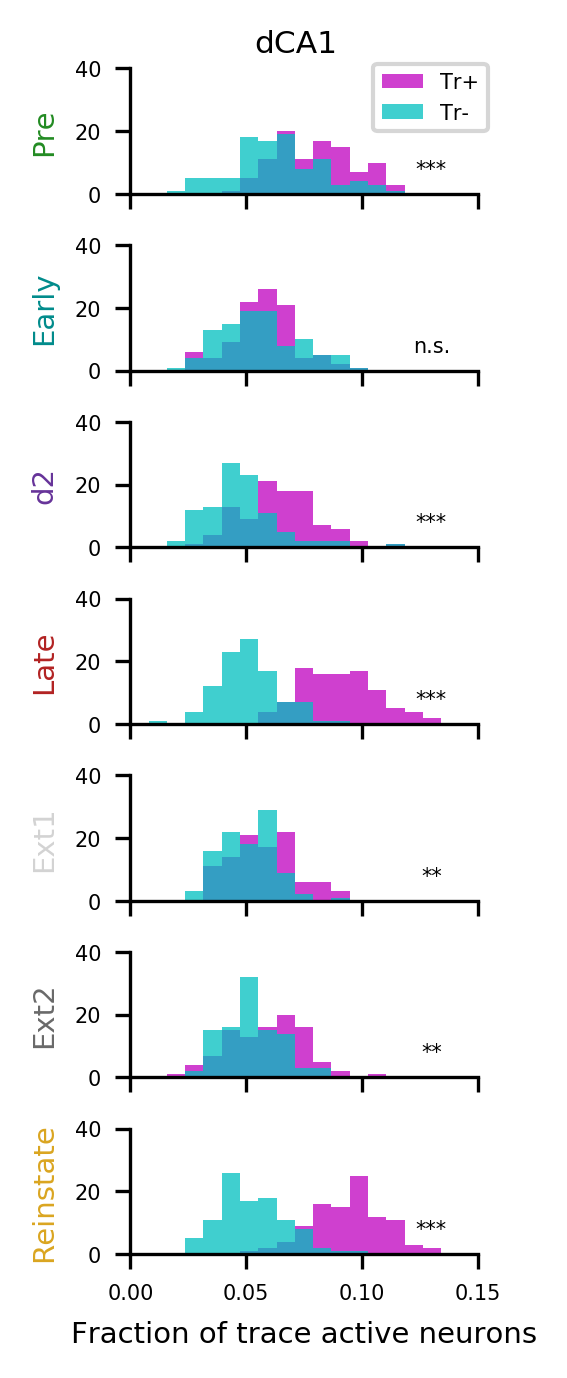

In [47]:
fig, ax = pl.subplots(7, 1, figsize=(1.8, 4.5), sharey=True, sharex=True)

for sess,i,sess_la in zip(sessions,range(7),('Pre','Early','d2','Late','Ext1','Ext2','Reinstate')):
    #[ax[i].hist(eval("(patterns_comb_tr_%s[labels_comb==odor]>0).mean(1)"%sess),histtype='step', bins=np.linspace(0, 0.25, 20))
    # for odor in [0, 1]]
    ax[i].hist(eval("(patterns_comb_tr_%s_1s[labels_comb==0]>0).mean(1)"%sess),color='m',histtype='stepfilled',alpha=.75, bins=np.linspace(0, 0.15, 20))
    ax[i].hist(eval("(patterns_comb_tr_%s_1s[labels_comb==1]>0).mean(1)"%sess),color='c',histtype='stepfilled',alpha=.75, bins=np.linspace(0, 0.15, 20))
    ax[i].set_ylabel(sess_la, color = dark_co[i]);

ax[0].set_yticks((0,20,40))
ax[0].set_xlim(0, 0.15)

ax[i].set_xlabel('Fraction of trace active neurons')
ax[0].legend(['Tr+', 'Tr-'], loc=(.7, .5))
pl.suptitle('dCA1',x=.55,y=1,fontsize=7.5)

pvs = []
for sess,i in zip(sessions,range(7)):
    pvs.append(pt.add_significance(ax[i],
                    eval("(patterns_comb_tr_%s_1s[labels_comb==0]>0).mean(1)"%sess),
                    eval("(patterns_comb_tr_%s_1s[labels_comb==1]>0).mean(1)"%sess),
                    0.13, 0.13, 6, ticksize=0,
                               sig_func=sstats.ks_2samp))
ax[0].set_ylim(0, 40)
fig.tight_layout(pad=1.5)

fig.savefig('../final-ish figures/%s_fraction_active_tr_1s.pdf'%NOTEBOOK_NAME)
np.savetxt('../final-ish figures/%s_fraction_active_tr_1s.pvs'%NOTEBOOK_NAME, pvs, header='sstats_KS_2samp')

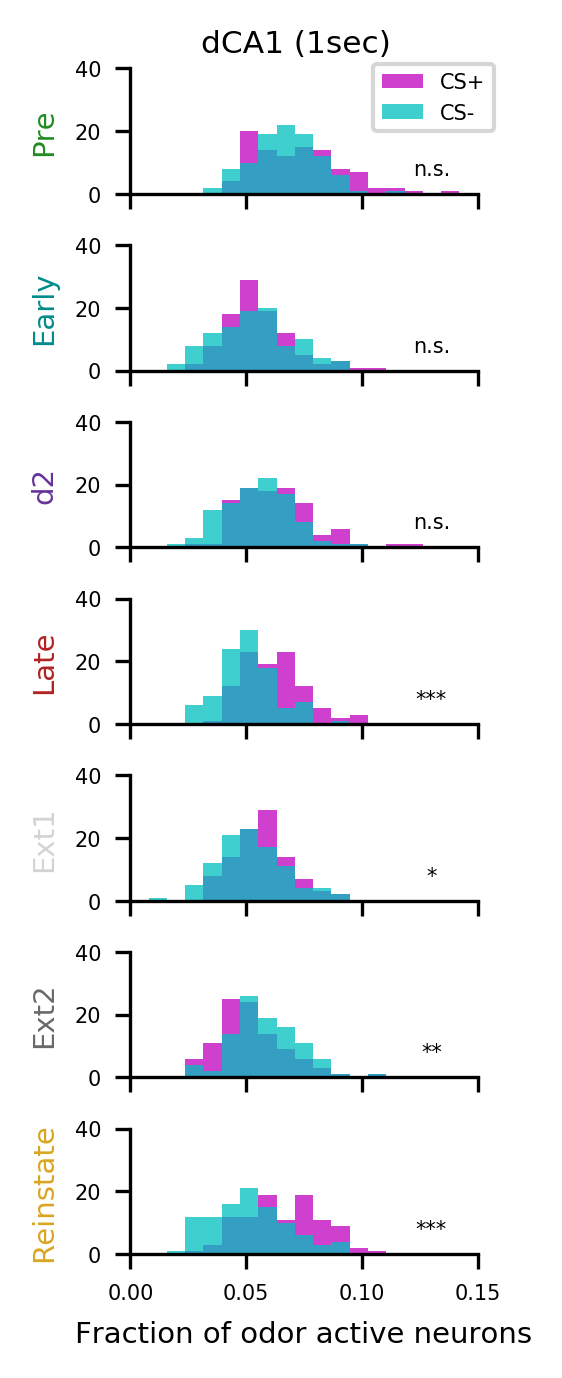

In [48]:
fig, ax = pl.subplots(7, 1, figsize=(1.8, 4.5), sharey=True, sharex=True)

for sess,i,sess_la in zip(sessions,range(7),('Pre','Early','d2','Late','Ext1','Ext2','Reinstate')):
    #[ax[i].hist(eval("(patterns_comb_tr_%s[labels_comb==odor]>0).mean(1)"%sess),histtype='step', bins=np.linspace(0, 0.25, 20))
    # for odor in [0, 1]]
    ax[i].hist(eval("(patterns_comb_CS_%s_1s[labels_comb==0]>0).mean(1)"%sess),color='m',histtype='stepfilled',alpha=.75, bins=np.linspace(0, 0.15, 20))
    ax[i].hist(eval("(patterns_comb_CS_%s_1s[labels_comb==1]>0).mean(1)"%sess),color='c',histtype='stepfilled',alpha=.75, bins=np.linspace(0, 0.15, 20))
    ax[i].set_ylabel(sess_la, color = dark_co[i]);

ax[0].set_yticks((0,20,40))
ax[0].set_xlim(0, 0.15)

ax[i].set_xlabel('Fraction of odor active neurons')
ax[0].legend(['CS+', 'CS-'], loc=(.7, .5))
pl.suptitle('dCA1 (1sec)',x=.55,y=1,fontsize=7.5)

pvs = []
for sess,i in zip(sessions,range(7)):
    pvs.append(pt.add_significance(ax[i],
                    eval("(patterns_comb_CS_%s_1s[labels_comb==0]>0).mean(1)"%sess),
                    eval("(patterns_comb_CS_%s_1s[labels_comb==1]>0).mean(1)"%sess),
                    0.13, 0.13, 6, ticksize=0,
                               sig_func=sstats.ks_2samp))
ax[0].set_ylim(0, 40)
fig.tight_layout(pad=1.5)

fig.savefig('../final-ish figures/%s_fraction_active_CS_1s.pdf'%NOTEBOOK_NAME)
np.savetxt('../final-ish figures/%s_fraction_active_CS_1s.pvs'%NOTEBOOK_NAME, pvs, header='sstats_KS_2samp')

### now look at % trials a cells is active

In [31]:
for sess in 'pre','d2', 'post', 'ext1', 'ext2', 'renew',:
    exec('selectivity_%s = {}'%sess)
    for ani in eval('%s_animals'%sess):
        try:
            eval('selectivity_%s'%sess).update({ani: ut.load_variable('selectivity', '../%s/%s/notebooks/autorestore/selectivity_JSB/'%(ani, sess))})
        except IOError:
            continue

In [32]:
for sess in 'pre','d2', 'post', 'ext1', 'ext2', 'renew',:
    exec('selectivity_%s_1s = {}'%sess)
    for ani in eval('%s_animals'%sess):
        try:
            eval('selectivity_%s_1s'%sess).update({ani: ut.load_variable('selectivity', '../%s/%s/notebooks/autorestore/selectivity_1sec_JSB/'%(ani, sess))})
        except IOError:
            continue

In [40]:
#have to extract 2_odor_expo varibles differently from that used above
selectivity_expo_1s = dict(zip(expo_animals,
                                [ut.load_variable('selectivity','../%s/2_odor_expo/notebooks/autorestore/selectivity_1sec_JSB'%ani)
                                                  for ani in expo_animals]))

In [35]:
pvalue = 0.05

In [36]:
def trials_active(patterns,labels,odor=0,which_cells=None):
    cells = []
    for ani in patterns.keys():
        if which_cells == None:
            these_cells = range(len(patterns[ani][0]))
        else:
            these_cells = np.where(which_cells[ani]>0)[0]
        print these_cells
        for p in these_cells:
            trials_active = 0
            for t in patterns[ani][np.where(labels[ani]==odor)]:
                if t[p]>0:
                    trials_active = trials_active+1
            print trials_active,
            cells.append(trials_active)
    return cells           

In [37]:
def percent_trials_active(patterns,labels,odor=0,which_cells=None):
    cells = []
    for ani in patterns.keys():
        if which_cells == None:
            these_cells = range(len(patterns[ani][0]))
        else:
            these_cells = np.where(which_cells[ani]>0)[0]
        #print these_cells
        for p in these_cells:
            trials_active = 0
            for t in patterns[ani][np.where(labels[ani]==odor)]:
                if t[p]>0:
                    trials_active = trials_active+1
            #print trials_active,
            cells.append(trials_active/(np.float(sum(labels[ani]==odor))))
    return cells           

In [39]:
for sess in 'expo', 'pre','d2', 'post', 'ext1', 'ext2', 'renew',:
    for tt in 'rewardt','CSmt':
        for epoch in '','_tr','_us':
            exec("sel_cells_%s_%s%s_up = {}"%(sess,tt,epoch))
            exec("non_sel_cells_%s_%s%s = {}"%(sess,tt,epoch))
            for ani in eval('%s_animals'%sess):
                d_up = []
                exec("pvalues_%s_%s%s = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s[ani]['%s%s']])"%(sess,tt,epoch,sess,tt,epoch))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s[ani]['%s%s']]]"%(sess,tt,epoch))
                exec("sel_cells_%s_%s%s_up[ani] = (pvalues_%s_%s%s < pvalue)*d_up"%(sess,tt,epoch,sess,tt,epoch))
                exec("non_sel_cells_%s_%s%s[ani] = (pvalues_%s_%s%s > pvalue)"%(sess,tt,epoch,sess,tt,epoch))

KeyError: 'dhpc35'

In [41]:
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for tt in zip([1,0],['rewardt','CSmt']):
        for epoch in zip(['CS','tr','cstr'],['','_tr','_cstr']):
            exec("percent_trials_active_sel_%s_%s%s = percent_trials_active(patterns_%s_%s,labels_%s,odor=%s,\
            which_cells=sel_cells_%s_%s%s_up)"%(sess,tt[1],epoch[1],epoch[0],sess,sess,tt[0],sess,tt[1],epoch[1]))

KeyError: 'dhpc36'

In [28]:
all_sel_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '','_tr','_cstr':
            exec("all_sel_values['%s_%s%s'] = np.mean(percent_trials_active_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [29]:
CS_sel_values = {}
CS_sel_err = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '',:
            exec("CS_sel_values['%s_%s%s'] = np.mean(percent_trials_active_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          
            exec("CS_sel_err['%s_%s%s'] = sstats.sem(percent_trials_active_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [30]:
Tr_sel_values = {}
Tr_sel_err={}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '_tr',:
            exec("Tr_sel_values['%s_%s%s'] = np.mean(percent_trials_active_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))
            exec("Tr_sel_err['%s_%s%s'] = sstats.sem(percent_trials_active_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))

In [31]:
cstr_sel_values = {}
cstr_sel_err = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '_cstr',:
            exec("cstr_sel_values['%s_%s%s'] = np.mean(percent_trials_active_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))
            exec("cstr_sel_err['%s_%s%s'] = sstats.sem(percent_trials_active_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))            

In [62]:
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for tt in zip([1,0],['rewardt','CSmt']):
        for epoch in zip(['CS','tr','cstr'],['','_tr','_cstr']):
            exec("percent_trials_active_non_sel_%s_%s%s = percent_trials_active(patterns_%s_%s,labels_%s,odor=%s,\
            which_cells=non_sel_cells_%s_%s%s)"%(sess,tt[1],epoch[1],epoch[0],sess,sess,tt[0],sess,tt[1],epoch[1]))

KeyError: 'dhpc36'

In [33]:
all_non_sel_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '','_tr','_cstr':
            exec("all_non_sel_values['%s_%s%s'] = np.mean(percent_trials_active_non_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [34]:
CS_non_sel_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '',:
            exec("CS_non_sel_values['%s_%s%s'] = np.mean(percent_trials_active_non_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [35]:
Tr_non_sel_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '_tr',:
            exec("Tr_non_sel_values['%s_%s%s'] = np.mean(percent_trials_active_non_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [36]:
cstr_non_sel_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '_cstr',:
            exec("cstr_non_sel_values['%s_%s%s'] = np.mean(percent_trials_active_non_sel_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [37]:
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for tt in zip([1,0],['rewardt','CSmt']):
        for epoch in zip(['CS','tr','cstr'],['','_tr','_cstr']):
            exec("percent_trials_active_%s_%s%s = percent_trials_active(patterns_%s_%s,labels_%s,odor=%s,\
            which_cells=None)"%(sess,tt[1],epoch[1],epoch[0],sess,sess,tt[0]))

NameError: name 'percent_trials_active' is not defined

In [38]:
all_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '','_tr','_cstr':
            exec("all_values['%s_%s%s'] = np.mean(percent_trials_active_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [39]:
CS_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '',:
            exec("CS_values['%s_%s%s'] = np.mean(percent_trials_active_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [40]:
Tr_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '_tr',:
            exec("Tr_values['%s_%s%s'] = np.mean(percent_trials_active_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

In [41]:
cstr_values = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '_cstr',:
            exec("cstr_values['%s_%s%s'] = np.mean(percent_trials_active_%s_%s%s)"%(sess,t,epoch,sess,t,epoch))          

(0, 0.5)

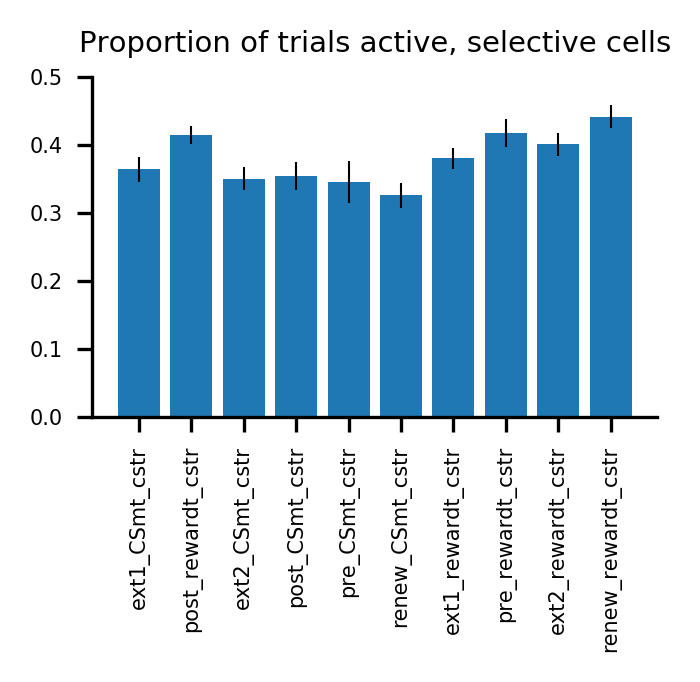

In [42]:
#rwd = [2,1,9,6,4]
pl.bar(range(len(cstr_sel_values)), list(cstr_sel_values.values()), align='center',yerr=cstr_sel_err.values())
pl.xticks(range(len(cstr_sel_values)), list(cstr_sel_values.keys()),rotation='90')
pl.title("Proportion of trials active, selective cells")
pl.ylim(0,.5)

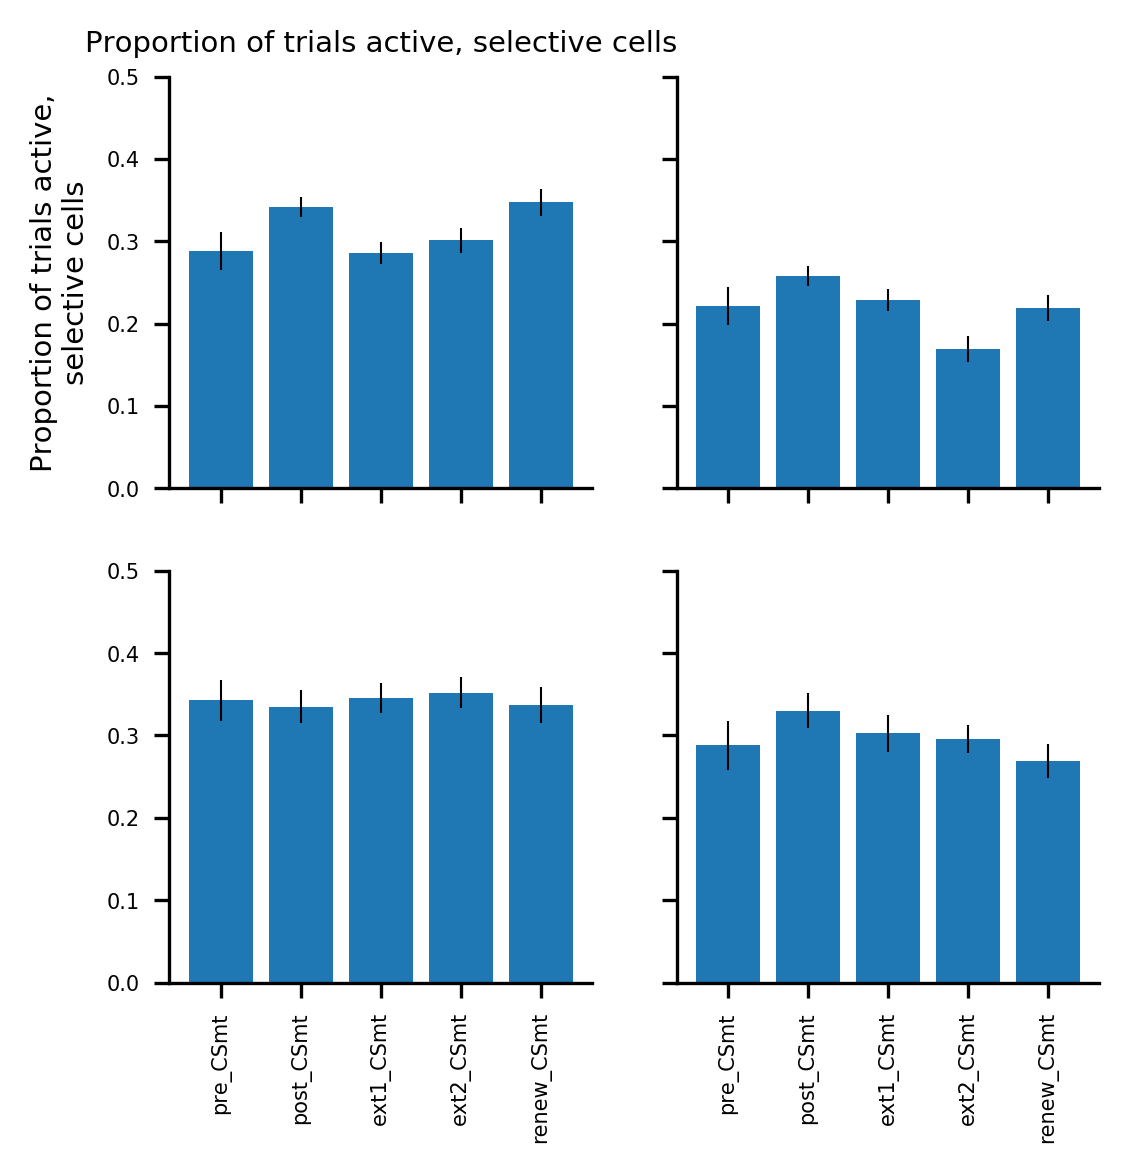

In [43]:
from operator import itemgetter
fig, axs = pl.subplots(2,2, figsize=(4,4),sharex=True, sharey=True)
#rwd = 2, 1, 9, 6, 4
#CS- = 8,5,7,3,0
axs[0][0].bar(range(5), list(itemgetter(2, 1, 9, 6, 4)(Tr_sel_values.values())), align='center',yerr=itemgetter(2, 1, 9, 6, 4)(Tr_sel_err.values()))
axs[0][0].set_xticks(range(5))
#axs[0][0].set_xticklabels(itemgetter(2, 1, 9, 6, 4)(Tr_sel_values.keys()),rotation='vertical')
axs[0][0].set_ylim(0,.5)
axs[0][0].set_ylabel("Proportion of trials active,\nselective cells")

axs[0][1].bar(range(5), list(itemgetter(8,5,7,3,0)(Tr_sel_values.values())), align='center',yerr=itemgetter(2, 1, 9, 6, 4)(Tr_sel_err.values()))
axs[0][1].set_xticks(range(5))
#axs[0][1].set_xticklabels(itemgetter(8,5,7,3,0)(Tr_sel_values.keys()),rotation='vertical')


#rwd = 7,6,1,9,3
#CS- = 4,2,8,0,5
axs[1][0].bar(range(5), list(itemgetter(7,6,1,9,3)(CS_sel_values.values())), align='center',yerr=itemgetter(7,6,1,9,3)(CS_sel_err.values()))
axs[1][0].set_xticks(range(5))
axs[1][0].set_xticklabels(itemgetter(7,6,1,9,3)(CS_sel_values.keys()),rotation='vertical')

axs[1][1].bar(range(5), list(itemgetter(4,2,8,0,5)(CS_sel_values.values())), align='center',yerr=itemgetter(4,2,8,0,5)(CS_sel_err.values()))
axs[1][1].set_xticks(range(5))
axs[1][1].set_xticklabels(itemgetter(4,2,8,0,5)(CS_sel_values.keys()),rotation='vertical')

axs[0][0].set_title("Proportion of trials active, selective cells")


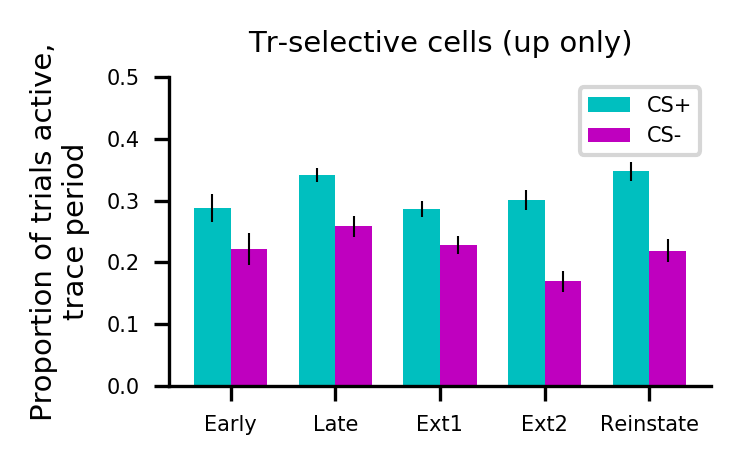

In [44]:
labels = ['Early','Late','Ext1','Ext2','Reinstate']
CSp_means = itemgetter(2, 1, 9, 6, 4)(Tr_sel_values.values())
CSp_err = itemgetter(2, 1, 9, 6, 4)(Tr_sel_err.values())
CSm_means = itemgetter(8,5,7,3,0)(Tr_sel_values.values())
CSm_err = itemgetter(8,5,7,3,0)(Tr_sel_err.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = pl.subplots()
rects1 = ax.bar(x - width/2, CSp_means, width, label='CS+', color = 'c',yerr=CSp_err)
rects2 = ax.bar(x + width/2, CSm_means, width, label='CS-', color = 'm',yerr=CSm_err)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of trials active,\ntrace period')
ax.set_title('Tr-selective cells (up only)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,0.5)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

pl.show()
fig.savefig('../img/%s_Tr_bars.jpg'%NOTEBOOK_NAME, bbox='tight')

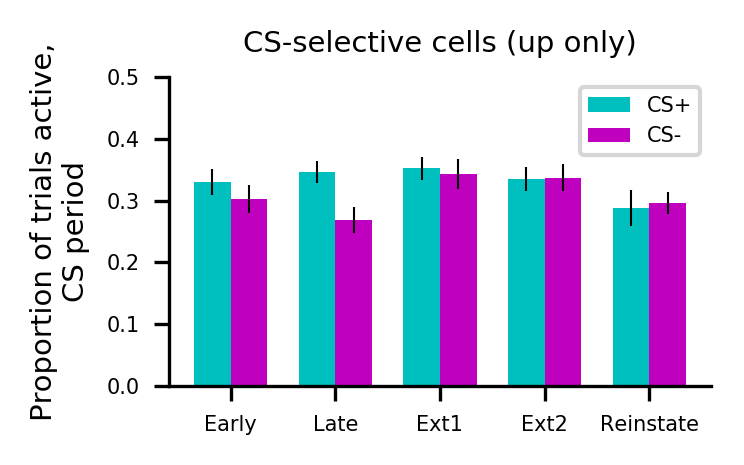

In [45]:
labels = ['Early','Late','Ext1','Ext2','Reinstate']
CSp_means = itemgetter(2, 1, 9, 6, 4)(CS_sel_values.values())
CSp_err = itemgetter(2, 1, 9, 6, 4)(CS_sel_err.values())
CSm_means = itemgetter(8,5,7,3,0)(CS_sel_values.values())
CSm_err = itemgetter(8,5,7,3,0)(CS_sel_err.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = pl.subplots()
rects1 = ax.bar(x - width/2, CSp_means, width, label='CS+', color = 'c',yerr=CSp_err)
rects2 = ax.bar(x + width/2, CSm_means, width, label='CS-', color = 'm',yerr=CSm_err)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of trials active,\nCS period')
ax.set_title('CS-selective cells (up only)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,0.5)

fig.tight_layout()
fig.savefig('../img/%s_CS_bars.jpg'%NOTEBOOK_NAME, bbox='tight')

In [46]:
cstr_sel_values.keys()

['ext1_CSmt_cstr',
 'post_rewardt_cstr',
 'ext2_CSmt_cstr',
 'post_CSmt_cstr',
 'pre_CSmt_cstr',
 'renew_CSmt_cstr',
 'ext1_rewardt_cstr',
 'pre_rewardt_cstr',
 'ext2_rewardt_cstr',
 'renew_rewardt_cstr']

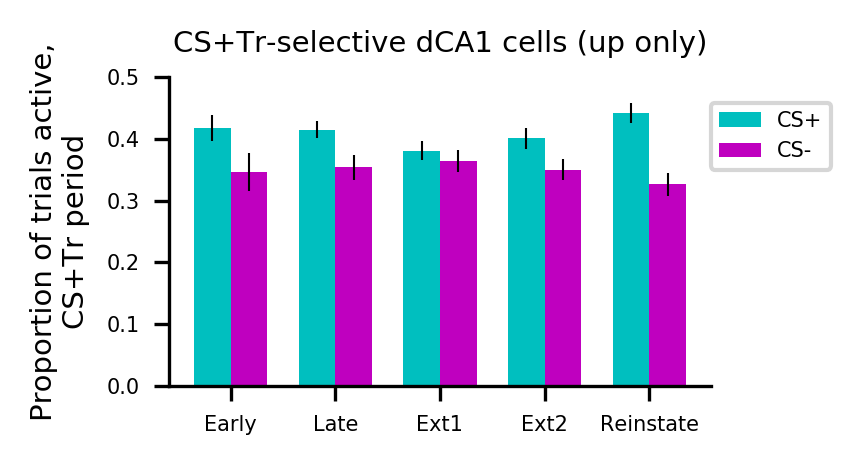

In [47]:
labels = ['Early','Late','Ext1','Ext2','Reinstate']
CSp_means = itemgetter(7,1,6,8,9)(cstr_sel_values.values())
CSp_err = itemgetter(7,1,6,8,9)(cstr_sel_err.values())
CSm_means = itemgetter(4,3,0,2,5)(cstr_sel_values.values())
CSm_err = itemgetter(4,3,0,2,5)(cstr_sel_err.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = pl.subplots()
rects1 = ax.bar(x - width/2, CSp_means, width, label='CS+', color = 'c',yerr=CSp_err)
rects2 = ax.bar(x + width/2, CSm_means, width, label='CS-', color = 'm',yerr=CSm_err)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of trials active,\nCS+Tr period')
ax.set_title('CS+Tr-selective dCA1 cells (up only)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=(1,.7))
ax.set_ylim(0,0.5)

fig.tight_layout()
fig.savefig('../img/%s_cstr_bars.jpg'%NOTEBOOK_NAME, bbox='tight')

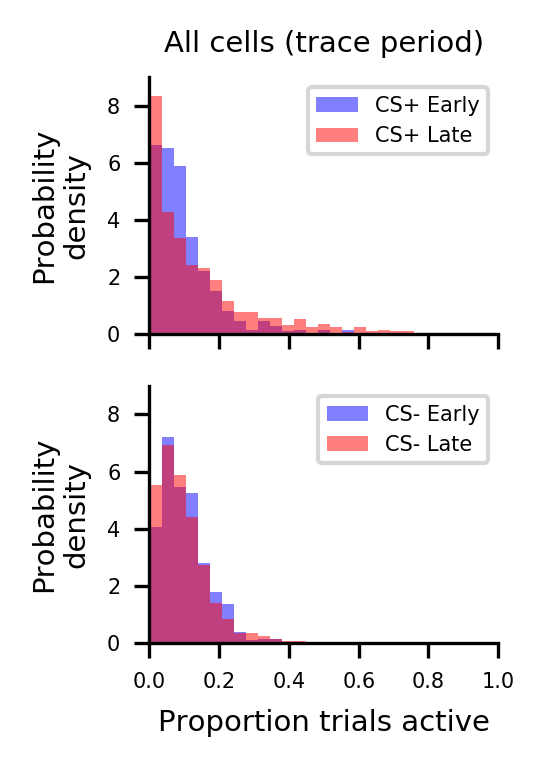

In [48]:
post_CSp = [percent_trials_active_post_rewardt_tr]
pre_CSp = [percent_trials_active_pre_rewardt_tr]
renew_CSp = [percent_trials_active_renew_rewardt_tr]
post_CSm = [percent_trials_active_post_CSmt_tr]
pre_CSm = [percent_trials_active_pre_CSmt_tr]
renew_CSm = [percent_trials_active_renew_CSmt_tr]

bins = np.linspace(0, 1, 30)

fig, axs = pl.subplots(2,1,figsize=(1.5,2.5),sharex=True, sharey=True)
axs[0].hist(pre_CSp, bins, alpha=0.5, label='CS+ Early',color='b',normed=True)
axs[0].hist(post_CSp, bins, alpha=0.5, label='CS+ Late',color='r',normed=True)
axs[0].legend(loc='upper right')
axs[0].set_title("All cells (trace period)")
axs[0].set_ylabel("Probability\ndensity")


axs[1].hist(pre_CSm, bins, alpha=0.5, label='CS- Early',color='b',normed=True)
axs[1].hist(post_CSm, bins, alpha=0.5, label='CS- Late',color='r',normed=True)
axs[1].legend(loc='upper right')
axs[1].set_xlabel("Proportion trials active")
axs[1].set_ylabel("Probability\ndensity")
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,9)
#pl.show()
fig.savefig('../img/%s_Tr_histo.jpg'%NOTEBOOK_NAME, bbox='tight')

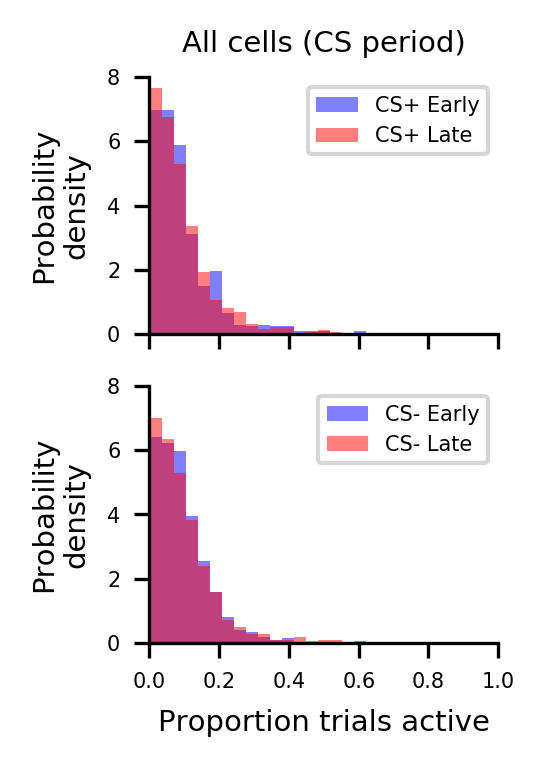

In [49]:
post_CSp = [percent_trials_active_post_rewardt]
pre_CSp = [percent_trials_active_pre_rewardt]
renew_CSp = [percent_trials_active_renew_rewardt]
post_CSm = [percent_trials_active_post_CSmt]
pre_CSm = [percent_trials_active_pre_CSmt]
renew_CSm = [percent_trials_active_renew_CSmt]

bins = np.linspace(0, 1, 30)

fig, axs = pl.subplots(2,1,figsize = (1.5,2.5),sharex=True, sharey=True)
axs[0].hist(pre_CSp, bins, alpha=0.5, label='CS+ Early',color='b',normed=True)
axs[0].hist(post_CSp, bins, alpha=0.5, label='CS+ Late',color='r',normed=True)
axs[0].legend(loc='upper right')
axs[0].set_title("All cells (CS period)")
axs[0].set_ylabel("Probability\ndensity")


axs[1].hist(pre_CSm, bins, alpha=0.5, label='CS- Early',color='b',normed=True)
axs[1].hist(post_CSm, bins, alpha=0.5, label='CS- Late',color='r',normed=True)
axs[1].legend(loc='upper right')
axs[1].set_xlabel("Proportion trials active")
axs[1].set_ylabel("Probability\ndensity")
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,8)
#pl.show()

fig.savefig('../img/%s_CS_histo.jpg'%NOTEBOOK_NAME, bbox='tight')

### 1sec

In [50]:
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for tt in 'rewardt','CSmt':
        for epoch in '','_tr','_us':
            exec("sel_cells_%s_%s%s_up_1s = {}"%(sess,tt,epoch))
            exec("non_sel_cells_%s_%s%s_1s = {}"%(sess,tt,epoch))
            for ani in eval('%s_animals'%sess):
                d_up = []
                exec("pvalues_%s_%s%s_1s = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s_1s[ani]['%s%s']])"%(sess,tt,epoch,sess,tt,epoch))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s_1s[ani]['%s%s']]]"%(sess,tt,epoch))
                exec("sel_cells_%s_%s%s_up_1s[ani] = (pvalues_%s_%s%s_1s < pvalue)*d_up"%(sess,tt,epoch,sess,tt,epoch))
                exec("non_sel_cells_%s_%s%s_1s[ani] = (pvalues_%s_%s%s_1s > pvalue)"%(sess,tt,epoch,sess,tt,epoch))

In [56]:
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for tt in zip([1,0],['rewardt','CSmt']):
        for epoch in zip(['CS','tr'],['','_tr',]):
            exec("percent_trials_active_%s_%s%s_1s = percent_trials_active(patterns_%s_%s_1s,labels_%s,odor=%s,\
            which_cells=None)"%(sess,tt[1],epoch[1],epoch[0],sess,sess,tt[0]))

In [57]:
all_values_1s = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '','_tr':
            exec("all_values_1s['%s_%s%s'] = np.mean(percent_trials_active_%s_%s%s_1s)"%(sess,t,epoch,sess,t,epoch))          

In [58]:
CS_values_1s = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '',:
            exec("CS_values_1s['%s_%s%s'] = np.mean(percent_trials_active_%s_%s%s_1s)"%(sess,t,epoch,sess,t,epoch))          

In [59]:
Tr_values_1s = {}
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew',:
    for t in 'rewardt','CSmt':
        for epoch in '_tr',:
            exec("Tr_values_1s['%s_%s%s'] = np.mean(percent_trials_active_%s_%s%s_1s)"%(sess,t,epoch,sess,t,epoch))          

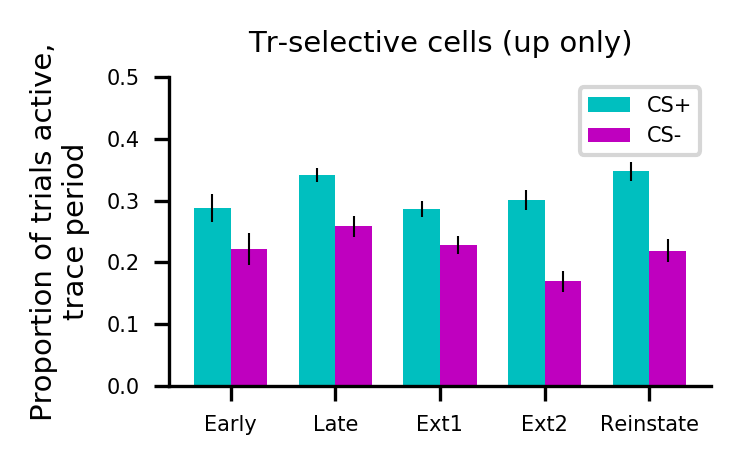

In [44]:
labels = ['Early','Late','Ext1','Ext2','Reinstate']
CSp_means = itemgetter(2, 1, 9, 6, 4)(Tr_sel_values.values())
CSp_err = itemgetter(2, 1, 9, 6, 4)(Tr_sel_err.values())
CSm_means = itemgetter(8,5,7,3,0)(Tr_sel_values.values())
CSm_err = itemgetter(8,5,7,3,0)(Tr_sel_err.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = pl.subplots()
rects1 = ax.bar(x - width/2, CSp_means, width, label='CS+', color = 'c',yerr=CSp_err)
rects2 = ax.bar(x + width/2, CSm_means, width, label='CS-', color = 'm',yerr=CSm_err)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of trials active,\ntrace period')
ax.set_title('Tr-selective cells (up only)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,0.5)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

pl.show()
fig.savefig('../img/%s_Tr_bars.jpg'%NOTEBOOK_NAME, bbox='tight')

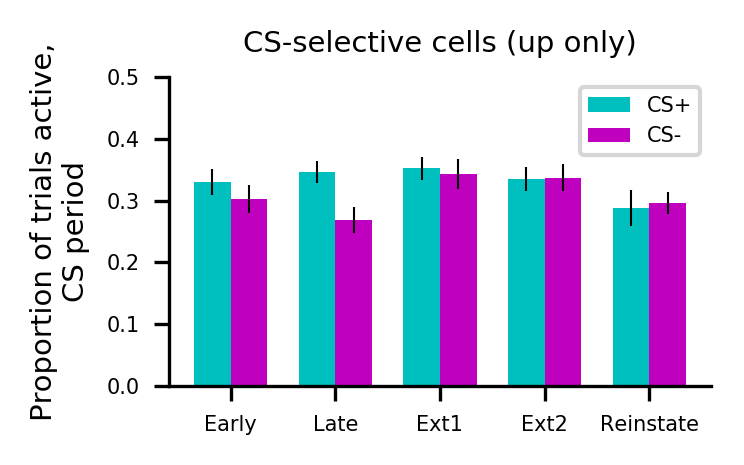

In [45]:
labels = ['Early','Late','Ext1','Ext2','Reinstate']
CSp_means = itemgetter(2, 1, 9, 6, 4)(CS_sel_values.values())
CSp_err = itemgetter(2, 1, 9, 6, 4)(CS_sel_err.values())
CSm_means = itemgetter(8,5,7,3,0)(CS_sel_values.values())
CSm_err = itemgetter(8,5,7,3,0)(CS_sel_err.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = pl.subplots()
rects1 = ax.bar(x - width/2, CSp_means, width, label='CS+', color = 'c',yerr=CSp_err)
rects2 = ax.bar(x + width/2, CSm_means, width, label='CS-', color = 'm',yerr=CSm_err)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion of trials active,\nCS period')
ax.set_title('CS-selective cells (up only)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,0.5)

fig.tight_layout()
fig.savefig('../img/%s_CS_bars.jpg'%NOTEBOOK_NAME, bbox='tight')

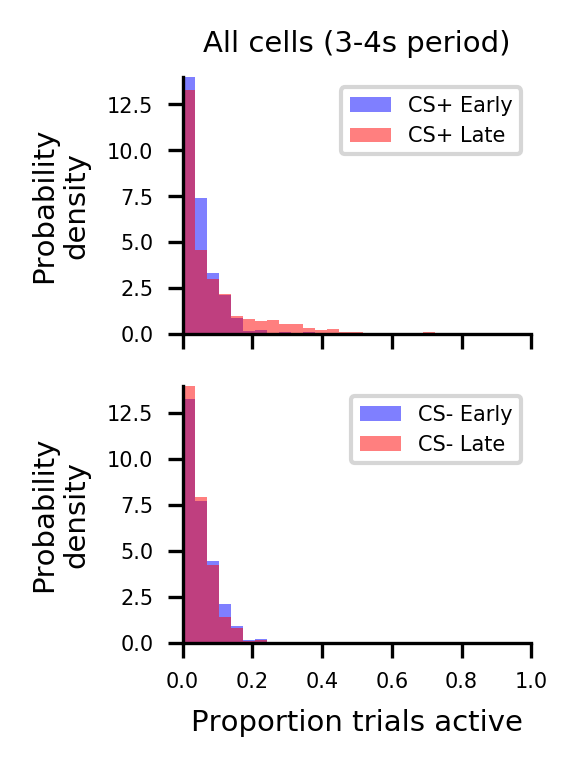

In [60]:
post_CSp = [percent_trials_active_post_rewardt_tr_1s]
pre_CSp = [percent_trials_active_pre_rewardt_tr_1s]
renew_CSp = [percent_trials_active_renew_rewardt_tr_1s]
post_CSm = [percent_trials_active_post_CSmt_tr_1s]
pre_CSm = [percent_trials_active_pre_CSmt_tr_1s]
renew_CSm = [percent_trials_active_renew_CSmt_tr_1s]

bins = np.linspace(0, 1, 30)

fig, axs = pl.subplots(2,1,figsize=(1.5,2.5),sharex=True, sharey=True)
axs[0].hist(pre_CSp, bins, alpha=0.5, label='CS+ Early',color='b',normed=True)
axs[0].hist(post_CSp, bins, alpha=0.5, label='CS+ Late',color='r',normed=True)
axs[0].legend(loc='upper right')
axs[0].set_title("All cells (3-4s period)")
axs[0].set_ylabel("Probability\ndensity")


axs[1].hist(pre_CSm, bins, alpha=0.5, label='CS- Early',color='b',normed=True)
axs[1].hist(post_CSm, bins, alpha=0.5, label='CS- Late',color='r',normed=True)
axs[1].legend(loc='upper right')
axs[1].set_xlabel("Proportion trials active")
axs[1].set_ylabel("Probability\ndensity")
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,14)
#pl.show()
fig.savefig('../img/%s_Tr_histo_1s.jpg'%NOTEBOOK_NAME, bbox='tight')

In [49]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
